In [5]:

import pandas as pd
import pandas_datareader as data # dont like using data as namespace for module
import numpy as np
import pickle
# import pandas_datareader.data as web # from datareader doc
import datetime as dt
import os
import yfinance as yf


You will create a function to help you to get the data when they are not recorded on your risk:


In [3]:
# yf.pdr_override()
def load_financial_data(start_date, end_date,output_file):
    try:
        df = pickle.load(open('goog_data.pkl','rb'))## Read the pickle format file (output_file)
        print('File data found...reading GOOG data')
    except FileNotFoundError:
        print('File not found...downloading the GOOG data')
#         df = web.DataReader('GE', 'yahoo', start='2019-09-10', end='2019-10-09')

        df = data.DataReader('GOOG', 'yahoo', start=start_date, end=end_date)## Use the panda datareader to get the data from yahoo
        pickle.dump(df,open(output_file,'wb'))
        ### Store the df to the pickle format file (output_file)
        print(df)
    return df

#Use the function load_financial_data
goog_data=load_financial_data(start_date='2001-01-01',
                              end_date = '2018-01-01',
                              output_file='goog_data.pkl')


File data found...reading GOOG data


In [4]:
# Initialize the short and long windows
short_window = 40
long_window = 100

In [4]:
# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=goog_data.index)
signals['signal'] = 0.0



In [5]:
# Create short simple moving average over the short window
signals['short_mavg'] = goog_data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = goog_data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)

In [54]:
# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)
signals.head(50)

            signal   short_mavg   long_mavg  positions
Date                                                  
2004-08-19     0.0    49.982655   49.982655        NaN
2004-08-20     0.0    51.967712   51.967712        0.0
2004-08-23     0.0    52.810387   52.810387        0.0
2004-08-24     0.0    52.667589   52.667589        0.0
2004-08-25     0.0    52.694489   52.694489        0.0
...            ...          ...         ...        ...
2017-12-22     1.0  1034.144495  978.995499        0.0
2017-12-26     1.0  1035.081244  980.326398        0.0
2017-12-27     1.0  1035.887744  981.540498        0.0
2017-12-28     1.0  1036.675244  982.728298        0.0
2017-12-29     1.0  1037.197745  983.924399        0.0

[3366 rows x 4 columns]


,signal,short_mavg,long_mavg,positions
Date,,,,
2004-08-19,0.0,49.982655,49.982655,NaN
2004-08-20,0.0,51.967712,51.967712,0.0
2004-08-23,0.0,52.810387,52.810387,0.0
2004-08-24,0.0,52.667589,52.667589,0.0
2004-08-25,0.0,52.694489,52.694489,0.0
2004-08-26,0.0,52.870993,52.870993,0.0
2004-08-27,0.0,52.871823,52.871823,0.0
2004-08-30,0.0,52.614662,52.614662,0.0
2004-08-31,0.0,52.434573,52.434573,0.0


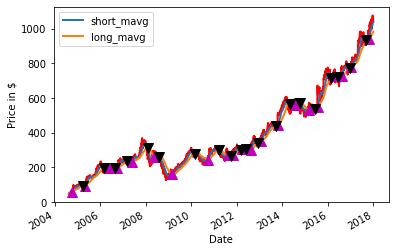

In [8]:
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()
# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price in $')

# Plot the closing price
goog_data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()


In [113]:
# Set the initial capital
initial_capital = float(100000.0)

# Create a DataFrame `positions`
portfolio = pd.DataFrame(columns=['goog_data','holdings','shares','signals','cash','total','returns'],index=goog_data.index)

portfolio['goog_data'] = goog_data['Close']
# Buy a 100 shares
cash = initial_capital - portfolio.iloc[0]['goog_data'] * 100
shares = 100
# Initialize the portfolio with value owned   


# Store the difference in shares owned 
portfolio['shares'] = signals['signal'] * 100
portfolio['signals'] = signals['positions']
# portfolio.loc['2004-08-19 00:00:00','holdings'] = portfolio.loc['goog_data'] * 100
# Add `holdings` to portfolio
portfolio['holdings'] = portfolio['shares'] * portfolio['goog_data']

# Add `cash` to portfolio
portfolio.loc['2004-08-19 00:00:00','cash'] = initial_capital
cash = initial_capital
for i, row in portfolio.iloc[1:].iterrows():
    portfolio.loc[i,'shares'] = portfolio.loc[i,'shares'] + portfolio.loc[i,'signals'] * row['goog_data']
    portfolio.loc[i,'cash'] = cash - portfolio.loc[i,'signals'] * 100 * row['goog_data']
    cash = portfolio.loc[i,'cash']
    shares = portfolio.loc[i,'shares']
# portfolio['cash'] =  + portfolio['signals'] * 100 * goog_data
# portfolio['cash'] = cash
# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'] / initial_capital

# Print the first lines of `portfolio`
print(portfolio.head())
# positions
signals['signal']

            goog_data  holdings  shares  signals      cash     total returns
Date                                                                        
2004-08-19  49.982655       0.0     0.0      NaN  100000.0  100000.0     1.0
2004-08-20  53.952770       0.0     0.0      0.0  100000.0  100000.0     1.0
2004-08-23  54.495735       0.0     0.0      0.0  100000.0  100000.0     1.0
2004-08-24  52.239197       0.0     0.0      0.0  100000.0  100000.0     1.0
2004-08-25  52.802086       0.0     0.0      0.0  100000.0  100000.0     1.0


Date
2004-08-19    0.0
2004-08-20    0.0
2004-08-23    0.0
2004-08-24    0.0
2004-08-25    0.0
             ... 
2017-12-22    1.0
2017-12-26    1.0
2017-12-27    1.0
2017-12-28    1.0
2017-12-29    1.0
Name: signal, Length: 3366, dtype: float64

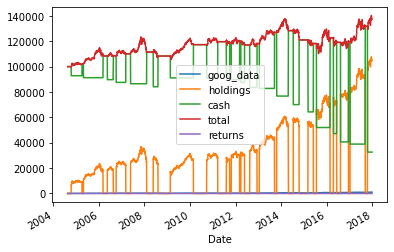

In [117]:
portfolio[['goog_data','holdings','cash','total','returns']].plot()
plt.show()

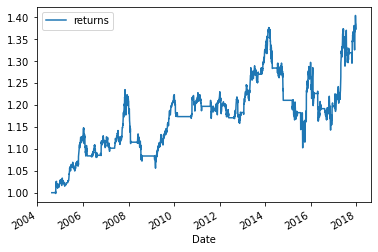

In [118]:
portfolio[['returns']].plot()
plt.show()

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
# X = np.array([goog_data['HML'][1:],goog_data['OMC'][1:],goog_data['Adj Close'][1:]])
goog_data['shift'] = goog_data['Adj Close'].shift(1)
goog_data = goog_data.dropna()
X = goog_data[['HML','OMC','Adj Close']]
y = goog_data['shift']
reg = LinearRegression().fit(X, y)
reg
# You will use predict to find the price of the following day:
prediction = reg.predict(X)
# goog_data['Prediction'] = prediction
# You will plot the same chart as above.
goog_data['Prediction'] = prediction
goog_data
goog_data['Price difference'] = goog_data['Prediction'] - goog_data['Adj Close']
# prediction
goog_data

goog_data
goog_data['HML'] = goog_data['High'] - goog_data['Low']
goog_data['OMC'] = goog_data['Open'] - goog_data['Close']
goog_data

goog_data['signal'] = np.where(goog_data['Prediction']
                                            > goog_data['Adj Close'], 1.0, 0.0)

goog_data['positions'] = goog_data['signal'].diff()
goog_data

C:\Users\John\AppData\Local\Temp/ipykernel_9480/1507484692.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_data['Prediction'] = prediction
C:\Users\John\AppData\Local\Temp/ipykernel_9480/1507484692.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_data['Price difference'] = goog_data['Prediction'] - goog_data['Adj Close']
C:\Users\John\AppData\Local\Temp/ipykernel_9480/1507484692.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,High,Low,Open,Close,Volume,Adj Close,HML,OMC,shift,Prediction,Price difference,signal,positions
Date,,,,,,,,,,,,,
2004-09-02,50.993862,49.285267,49.409801,50.565468,15190525.0,50.565468,1.708595,-1.155666,49.937820,49.377379,-1.188089,0.0,NaN
2004-09-03,50.680038,49.474556,50.286514,49.818268,5176932.0,49.818268,1.205482,0.468246,50.565468,50.262840,0.444572,1.0,1.0
2004-09-07,50.809551,49.619015,50.316402,50.600338,5875340.0,50.600338,1.190536,-0.283936,49.818268,50.305469,-0.294869,0.0,-1.0
2004-09-08,51.322632,50.062355,50.181908,50.958992,5009306.0,50.958992,1.260277,-0.777084,50.600338,50.173941,-0.785051,0.0,0.0
2004-09-09,51.163227,50.311420,51.073563,50.963974,4081040.0,50.963974,0.851807,0.109589,50.958992,51.079442,0.115468,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995,4.760010,0.989990,1063.630005,1060.899864,0.779869,1.0,0.0
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990,9.920044,1.329956,1060.119995,1057.505454,0.765464,1.0,0.0
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995,10.319946,8.020020,1056.739990,1056.694122,7.324126,1.0,0.0


,High,Low,Open,Close,Volume,Adj Close,HML,OMC
Date,,,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655,4.034878,-0.169365
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770,4.273979,-3.636368
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735,2.206730,0.672482
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197,4.000008,3.173103
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086,2.052307,-0.518059
...,...,...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995,4.760010,0.989990
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990,9.920044,1.329956
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995,10.319946,8.020020


Date
2004-08-20      49.982655
2004-08-23      53.952770
2004-08-24      54.495735
2004-08-25      52.239197
2004-08-26      52.802086
                 ...     
2017-12-22    1063.630005
2017-12-26    1060.119995
2017-12-27    1056.739990
2017-12-28    1049.369995
2017-12-29    1048.140015
Name: Adj Close, Length: 3365, dtype: float64

In [53]:
# Set the initial capital
initial_capital = float(100000.0)

# Create a DataFrame `positions`
portfolio_ml = pd.DataFrame(columns=['goog_data','holdings','shares','signals','cash','total','returns'],index=goog_data.index)

portfolio_ml['goog_data'] = goog_data['Close']
# Buy a 100 shares
cash = initial_capital - portfolio_ml.iloc[0]['goog_data'] * 100
shares = 100
# Initialize the portfolio with value owned   


# Store the difference in shares owned 
portfolio_ml['shares'] = goog_data['signal'] * 100
portfolio_ml['signals'] = goog_data['positions']
# portfolio.loc['2004-08-19 00:00:00','holdings'] = portfolio.loc['goog_data'] * 100
# Add `holdings` to portfolio
portfolio_ml['holdings'] = portfolio_ml['shares'] * portfolio_ml['goog_data']

# Add `cash` to portfolio
portfolio_ml.loc['2004-08-19 00:00:00','cash'] = initial_capital
cash = initial_capital
for i, row in portfolio_ml.iloc[1:].iterrows():
    portfolio_ml.loc[i,'shares'] = portfolio_ml.loc[i,'shares'] + portfolio_ml.loc[i,'signals'] * row['goog_data']
    portfolio_ml.loc[i,'cash'] = cash - portfolio_ml.loc[i,'signals'] * 100 * row['goog_data']
    cash = portfolio_ml.loc[i,'cash']
    shares = portfolio_ml.loc[i,'shares']
# portfolio['cash'] =  + portfolio['signals'] * 100 * goog_data
# portfolio['cash'] = cash
# Add `total` to portfolio
portfolio_ml['total'] = portfolio_ml['cash'] + portfolio_ml['holdings']

# Add `returns` to portfolio
portfolio_ml['returns'] = portfolio_ml['total'] / initial_capital

# Print the first lines of `portfolio`
print(portfolio_ml.head())
# positions


            goog_data     holdings      shares  signals           cash  \
Date                                                                     
2004-09-02  50.565468     0.000000    0.000000      NaN            NaN   
2004-09-03  49.818268  4981.826782  149.818268      1.0   95018.173218   
2004-09-07  50.600338     0.000000  -50.600338     -1.0  100078.207016   
2004-09-08  50.958992     0.000000    0.000000      0.0  100078.207016   
2004-09-09  50.963974  5096.397400  150.963974      1.0   94981.809616   

                    total   returns  
Date                                 
2004-09-02            NaN       NaN  
2004-09-03       100000.0       1.0  
2004-09-07  100078.207016  1.000782  
2004-09-08  100078.207016  1.000782  
2004-09-09  100078.207016  1.000782  


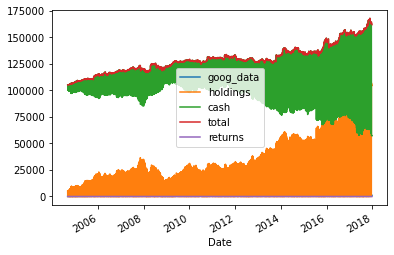

In [51]:
import matplotlib.pyplot as plt
portfolio_ml[['goog_data','holdings','cash','total','returns']].plot()
plt.show()